# 逻辑回归实战

## 1. 理论快速回顾

### 1.1 模型函数

$$ y = h(z) = \frac{1}{1 + e^{-z}} $$

其中：$ z = \theta^T x$

一般而言， 当 y > 0.5 时，z 被归类为真（True）或阳性（Positive），否则当 y <= 0.5 时，z被归类为假(False)或阴性(Negative)。

所以，在模型输出预测结果时，不必输出y的具体取值，而是根据上述判别标准，输出1（真）或0（假）。

### 1.2 损失函数

训练逻辑回归函数，已知了样本点(x,y)，目的是求出一组参数$\theta$。

模型函数 y=1 表示样本点为阳性，故而可以得到：
$$ P(y=1|x) = h(x); \quad P(y=0|x) = 1 - h(x) $$

对于这个二项分布，有：
$$ P(y|x) = h(x)^y \: (1 - h(x))^{(1-y)}$$

对于m个数据，有：
$$ L(\theta) = \frac{1}{m} \: \prod_{i=1}^m \: P(y^{(i)}|x^{(i)}; \theta) = \frac{1}{m} \: \prod_{i=1}^m \: (h_\theta(x^{(i)}))^{y^{(i)}} \: (1 - h_\theta(x^{(i)}))^{(1 - y^{(i)})} $$

为了方便计算，取负对数得到：
$$ J(\theta) = -\frac{1}{m} \: \log(L(\theta)) = -\frac{1}{m} \: \sum_{i=1}^m [y^{(i)} \: \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \: \log(1 - h_\theta(x^{(i)}))] $$

### 1.3 优化算法：梯度下降

求导推导不展开，结果是：
$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \: \sum_{i=1}^m [h_\theta(x^{(i)}) - y^{(i)}]x_j^{(i)} \:; \quad j = 1,2,...,n $$

将之向量化后：
$$ \triangledown J(\theta) = \frac{1}{m} \: X^T \: (h(X\theta) - y) $$

其中：h是sigmoid函数。

## 2. 实战

### 2.1 sigmoid函数实现

In [1]:
import numpy as np

In [2]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

### 2.2 实现一个训练进行拟合的函数

其中J表示损失函数，dJ表示损失函数求导后的形式，gradient_descent表示梯度下降函数。

In [3]:
# 使用梯度下降法训练Logisitc Regerssion模型
def fit(X_train, y_train, alpha=0.01, n_iters=1e4):
    # 损失函数
    def J(theta, X_b, y):
        y_hat = sigmoid(X_b.dot(theta))
        m = len(y)
        try:
            return -np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)) / m
        except:
            return float('inf')
    
    # 对损失函数求偏导
    def dJ(theta, X_b, y):
        m = len(y)
        return X_b.T.dot(sigmoid(X_b.dot(theta)) - y) / m
    
    # 梯度下降
    def gradient_descent(X_b, y, init_theta, alpha, n_iters=1e4, epsilon=1e-8):
        # Set init theta
        theta = init_theta
        
        # Set init iteration
        cur_iter = 0
        
        # 设置循环停止条件
        while cur_iter < n_iters:
            # 计算梯度
            gradient = dJ(theta, X_b, y)
            
            # 获取上一个theta
            old_theta = theta
            
            # 更新theta
            theta = theta - alpha * gradient
            
            # 设置循环停止条件
            if abs(J(theta, X_b, y) - J(old_theta, X_b, y)) < epsilon:
                break
            
            # 更新循环次数
            cur_iter += 1
        
        # 返回梯度下降法求解出来的theta
        return theta
    
    # 给 X_train 增加常数列 x=1
    X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
    
    # 设置初始化theta
    init_theta = np.zeros(X_b.shape[1])
    
    # 求解参数theta
    theta = gradient_descent(X_b, y_train, init_theta, alpha, n_iters)
    
    # 截距
    intercept = theta[0]
    
    # X_i 前的参数
    coef = theta[1:]
    
    return theta, intercept, coef

### 2.3 实现一个预测函数

其中需要注意，最终的预测函数predict返回的是0/1，而不是具体的概率。

predict_prob 函数中返回的是具体的概率。

In [4]:
# 给定待预测数据集X_test，返回表示X_test的结果概率向量
def predict_prob(X_test, theta):
    # 给 X_test 增加常数列 x=1
    X_b = np.hstack([np.ones((len(X_test), 1)), X_test])
    return sigmoid(X_b.dot(theta))

In [5]:
# 给定待预测数据集X_test，返回表示X_test的结果向量
def predict(X_test, theta):
    prob = predict_prob(X_test, theta)
    return np.array(prob >= 0.5, dtype='int')

### 2.4 效果评测函数

使用sklearn中的accuracy_score进行效果的评测

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
def score(X_test, y_test, theta):
    y_predict = predict(X_test, theta)
    return accuracy_score(y_test, y_predict)

## 3. 小数据集效果测试

使用sklearn中提供的鸢尾花数据集，并且为了便于查看特征只取了一个维度数据。

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
# 取鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [10]:
# 筛选特征
X = X[y < 2, :2]
y = y[y < 2]

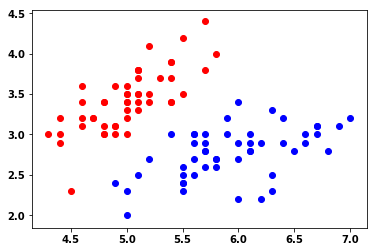

In [11]:
# 绘制出图像
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue")
plt.show()

In [12]:
# 切分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [13]:
theta, intercept, coef = fit(X_train, y_train)

In [14]:
print('theta: ',theta)
print('intercept', intercept)
print('coef', coef)

theta:  [-0.68273837  3.01749692 -5.03046934]
intercept -0.682738369899311
coef [ 3.01749692 -5.03046934]


In [15]:
print("final score is :{}".format(score(X_test, y_test, theta)))
print("actual prob is :")
print(predict_prob(X_test, theta))
print('actual lable is:')
print(predict(X_test, theta))

final score is :1.0
actual prob is :
[0.93292947 0.98717455 0.15541379 0.01786837 0.03909442 0.01972689
 0.05214631 0.99683149 0.98092348 0.75469962 0.0473811  0.00362352
 0.27122595 0.03909442 0.84902103 0.80627393 0.83574223 0.33477608
 0.06921637 0.21582553 0.0240109  0.1836441  0.98092348 0.98947619
 0.08342411]
actual lable is:
[1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0]
